In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Activation, BatchNormalization


### LOADING DATASET

In [4]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

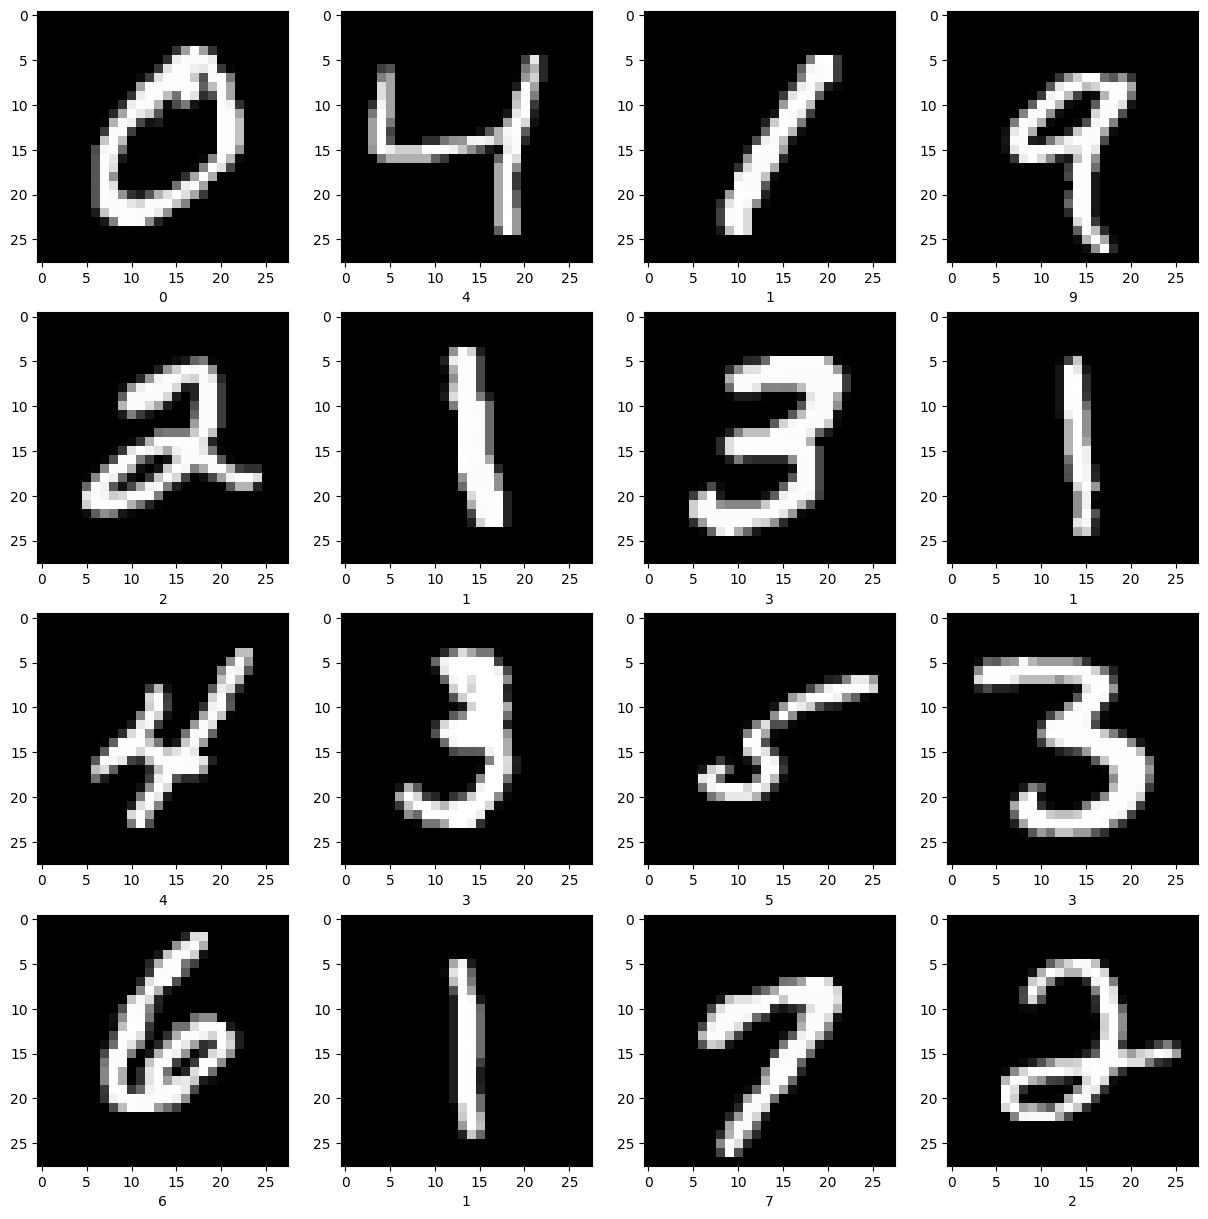

In [5]:
plt.figure(figsize=(15,15))
for i in range(1, 17):
    
    plt.subplot(4,4, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(str(Y_train[i]))
    # plt.xticks([])
    # plt.yticks([])

### DATA NORMALIZATION

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### CREATING A NEURAL NETWORK

In [10]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(784,)),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
h = model.fit(
    X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs = 100, verbose=2
)

Epoch 1/100
600/600 - 6s - loss: 1.7072 - accuracy: 0.4182 - val_loss: 1.2279 - val_accuracy: 0.6042 - 6s/epoch - 9ms/step
Epoch 2/100
600/600 - 1s - loss: 1.0006 - accuracy: 0.7042 - val_loss: 0.8181 - val_accuracy: 0.7663 - 1s/epoch - 2ms/step
Epoch 3/100
600/600 - 2s - loss: 0.7138 - accuracy: 0.8015 - val_loss: 0.6162 - val_accuracy: 0.8072 - 2s/epoch - 4ms/step
Epoch 4/100
600/600 - 2s - loss: 0.5680 - accuracy: 0.8451 - val_loss: 0.5179 - val_accuracy: 0.8670 - 2s/epoch - 4ms/step
Epoch 5/100
600/600 - 1s - loss: 0.4752 - accuracy: 0.8836 - val_loss: 0.4364 - val_accuracy: 0.8949 - 1s/epoch - 2ms/step
Epoch 6/100
600/600 - 1s - loss: 0.4146 - accuracy: 0.8984 - val_loss: 0.3991 - val_accuracy: 0.8991 - 974ms/epoch - 2ms/step
Epoch 7/100
600/600 - 1s - loss: 0.3775 - accuracy: 0.9058 - val_loss: 0.3668 - val_accuracy: 0.9070 - 1s/epoch - 2ms/step
Epoch 8/100
600/600 - 1s - loss: 0.3542 - accuracy: 0.9096 - val_loss: 0.3535 - val_accuracy: 0.9080 - 1s/epoch - 2ms/step
Epoch 9/100
6

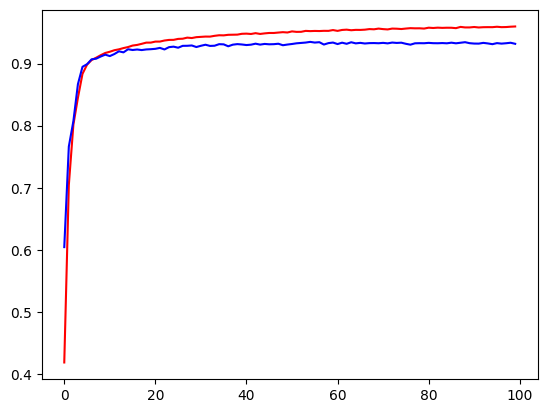

In [13]:
plt.plot(h.history['accuracy'], color='red')
plt.plot(h.history['val_accuracy'], color='blue')

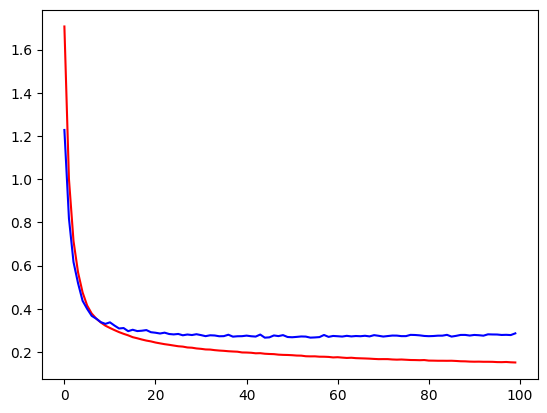

In [14]:
plt.plot(h.history['loss'], color='red')
plt.plot(h.history['val_loss'], color='blue')

### SAVING MODEL

In [15]:
model.save('MNIST.h5')